# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Linear-Regression-problem" data-toc-modified-id="Linear-Regression-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression problem</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent---Classification" data-toc-modified-id="Gradient-Descent---Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gradient Descent - Classification</a></div><div class="lev1 toc-item"><a href="#Gradient-descent-with-numpy" data-toc-modified-id="Gradient-descent-with-numpy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient descent with numpy</a></div>

In [1]:
%matplotlib inline
from fastai import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

In [2]:
#Init ramdomness...
np.random.seed(2)

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [3]:
n=200

In [4]:
# Expected parameters values
to_find = tensor(3.,2.);

In [5]:
x = torch.ones(n,2) 
x[:,0].uniform_()
x[:5]

tensor([[0.3734, 1.0000],
        [0.7603, 1.0000],
        [0.0459, 1.0000],
        [0.8284, 1.0000],
        [0.4452, 1.0000]])

**IMPORTANT**: the sample values of tensor 'y' should be CONSTANT and do not have gradient!

In [6]:
y = x@to_find + torch.ones(n).uniform_(-1, 1)

In [7]:
y.shape

torch.Size([200])

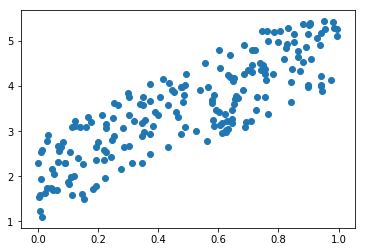

In [8]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [10]:
a = tensor(-1.,1)

In [11]:
y_hat = x@a
mse(y_hat, y)

tensor(10.6126)

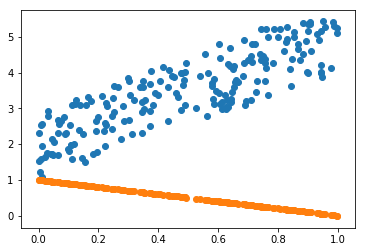

In [12]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [13]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [14]:
lr = 3e-1

In [15]:
def update(params: nn.Parameter, x:Tensor, y:Tensor, error_function, lr: float):
    y_hat = x@params
    loss = error_function(y, y_hat)
    loss.backward()
    with torch.no_grad():
        # Edit in place to accomodate the case when params is BIG
        params.sub_(lr * params.grad)
        params.grad.zero_()
    return (loss, params)

In [16]:
#Test
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))

Loss =  (tensor(10.6126, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0837, 2.7880], requires_grad=True))
Loss =  (tensor(1.5043, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.4342, 3.1872], requires_grad=True))
Loss =  (tensor(0.8991, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.5998, 3.2446], requires_grad=True))
Loss =  (tensor(0.8181, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.7163, 3.2193], requires_grad=True))
Loss =  (tensor(0.7729, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.8174, 3.1752], requires_grad=True))


In [17]:
lr = 5e-1
for t in range(100): 
    loss, params=update(a, x, y, mse, lr)
    if(0==(t % 10)):  print(str(loss),str(params))
print(a)

tensor(0.7333, grad_fn=<MeanBackward1>) Parameter containing:
tensor([0.9745, 3.0966], requires_grad=True)
tensor(0.3988, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.0345, 2.5411], requires_grad=True)
tensor(0.3224, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.5414, 2.2759], requires_grad=True)
tensor(0.3049, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.7837, 2.1491], requires_grad=True)
tensor(0.3009, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.8996, 2.0884], requires_grad=True)
tensor(0.3000, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9549, 2.0595], requires_grad=True)
tensor(0.2998, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9814, 2.0456], requires_grad=True)
tensor(0.2998, grad_fn=<MeanBackward1>) Parameter containing:
tensor([2.9941, 2.0390], requires_grad=True)
tensor(0.2998, grad_fn=<MeanBackward1>) Parameter containing:
tensor([3.0001, 2.0358], requires_grad=True)
tensor(0.2998, grad_fn=<MeanBackward1

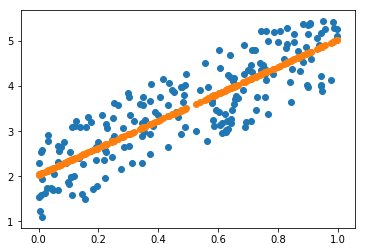

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [19]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [20]:
a = nn.Parameter(tensor(-1.,1))
n_iter = 200

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update(a,x,y,mse,lr)
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=20)

In [21]:
print('Predicted = ', str(a))
print('Expected = ', str(to_find))

Predicted =  Parameter containing:
tensor([3.0056, 2.0329], requires_grad=True)
Expected =  tensor([3., 2.])


# Try to predict a quadratic function

y = x^2*a + x*b + c

In [22]:
# Expected parameters values
to_find = tensor(.2, .1, -1);

In [23]:
x = torch.ones(n,3) 
x[:,1].uniform_(-2,2) # x^1
x[:,0] = x[:,1]**2 # x^2
x[:5]

tensor([[ 3.1348, -1.7705,  1.0000],
        [ 1.5338, -1.2385,  1.0000],
        [ 1.5919, -1.2617,  1.0000],
        [ 1.5066, -1.2274,  1.0000],
        [ 2.2315,  1.4938,  1.0000]])

In [24]:
y = x@to_find + torch.ones(n).uniform_(-1, 1)*.2
# VERY IMPORTANT: y is a constant tensor so it sholuldn't be attached to gradient
y.detach().requires_grad = False

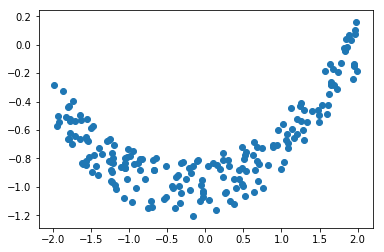

In [25]:
xxx = plt.scatter(x[:,1], y);

In [26]:
lr = 1e-2

In [27]:
a =  nn.Parameter(tensor(.1,.2,.3)) # Starting point
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))

Loss =  (tensor(1.3406, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0697, 0.1984, 0.2772], requires_grad=True))
Loss =  (tensor(1.2023, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0423, 0.1968, 0.2557], requires_grad=True))
Loss =  (tensor(1.0853, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0174, 0.1953, 0.2354], requires_grad=True))


In [28]:
a = nn.Parameter(tensor(-.2,.3, -.1))
lr = 5e-2
n_iter = 600

fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
scat = plt.scatter(x[:,1], x@a)
plt.close()

def animate(i):
    update(a,x,y,mse,lr)
    new_values = tensor((x[:,1]).numpy(),tensor((x@a)).detach().numpy()).numpy().T # Converts tu [N,2]
    scat.set_offsets(new_values)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=20)

In [29]:
print('Predicted = ', str(a))
print('Expected = ', str(to_find))

Predicted =  Parameter containing:
tensor([ 0.1940,  0.1059, -0.9812], requires_grad=True)
Expected =  tensor([ 0.2000,  0.1000, -1.0000])


# Try to predict a polynomial function

y = an*x^n + ... + a1*x + a0

In [30]:
n = 300 
n_iter = 800 

In [31]:
# Expected parameters values
to_find = tensor(-.24, .1, -.2, .3, .2);
poly_size = len(to_find) # It's (polynomial degree + 1)

Make function parametric on 't'

In [32]:
t = torch.ones(n,1).uniform_(-2,2)

In [33]:
x = torch.ones(n,poly_size)
for i in range(1,poly_size):
    x[:,i] = t[:,0]**i # oakward syntax...
x[:5]

tensor([[ 1.0000, -0.7670,  0.5883, -0.4512,  0.3461],
        [ 1.0000, -1.0969,  1.2032, -1.3197,  1.4476],
        [ 1.0000, -0.4415,  0.1949, -0.0860,  0.0380],
        [ 1.0000, -1.8103,  3.2773, -5.9331, 10.7409],
        [ 1.0000,  1.2101,  1.4643,  1.7719,  2.1441]])

In [34]:
noise_scale = .25
y = x@to_find + torch.ones(n).uniform_(-1, 1)*noise_scale
# VERY IMPORTANT: y is a constant tensor so it sholuldn't be attached to gradient
y.detach().requires_grad = False

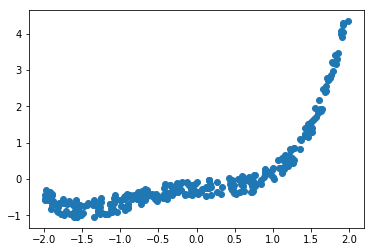

In [35]:
plt.scatter(x[:,1], y);

In [36]:
lr = 1e-2

In [37]:
a =  nn.Parameter(tensor(torch.rand(poly_size))) # Starting point
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))
print('Loss = ', str(update(a, x, y, mse, lr)))

Loss =  (tensor(3.4799, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0559, 0.6797, 0.0937, 0.3807, 0.1929], requires_grad=True))
Loss =  (tensor(1.2321, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0438, 0.6605, 0.0720, 0.3331, 0.1376], requires_grad=True))
Loss =  (tensor(0.7298, grad_fn=<MeanBackward1>), Parameter containing:
tensor([0.0361, 0.6438, 0.0617, 0.2919, 0.1169], requires_grad=True))


In [38]:
a = nn.Parameter(tensor(torch.rand(poly_size)/10.)) # Initialize with small values
lr = 1e-2

fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
scat = plt.scatter(x[:,1], x@a)
plt.close()

def animate(i):
    update(a,x,y,mse,lr)
    new_values = tensor((x[:,1]).numpy(),tensor((x@a)).detach().numpy()).numpy().T # Converts tu [N,2]
    scat.set_offsets(new_values)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 200), interval=20)

In [39]:
print('Predicted = ', str(a))
print('Expected = ', str(to_find))

Predicted =  Parameter containing:
tensor([-0.2604,  0.1512, -0.1320,  0.2845,  0.1818], requires_grad=True)
Expected =  tensor([-0.2400,  0.1000, -0.2000,  0.3000,  0.2000])


**IMPORTANT:** noise_scale influence the result.